- 출처 : 파이썬 머신러닝 완벽 가이드 

# 평균이동(Mean Shift)
- K-means와 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행
- 하지만 k-means이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동
- 평균 이동 알고리즘은 특정 대역폭(bandwidth)을 가지고 최초의 확률 밀도 중심 C0 내에서 데이터의 확률 밀도 중심이 더 높은 곳으로 중심을 이동
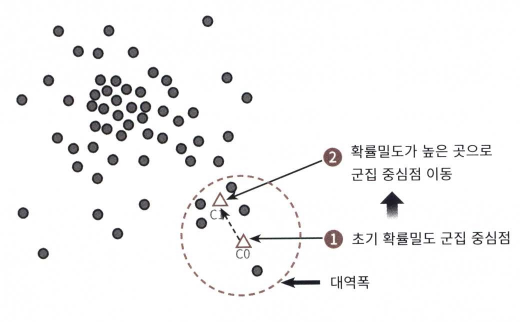
- 평균 이동은 데이터의 분포도를 이용해 군집 중심점을 찾음
- 군집 중심점은 데이터 포인트가 모여 있는 곳이라는 생각에서 착안하는 것이며 이를 위해서 밀도 함수(probability density function)를 이용
- 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 산정
- 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)를 이용
- 평균 이동 알고리즘은 임의의 포인트에서 시작해 이러한 피크 포인트를 찾을 때까지 KDE를 반복적으로 적용하며 군집화를 수행
## KDE(Kernel Density Estimation)
- 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
- 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정
- 확률 밀도 함수 PDF(Probability Density Function)는 확률 변수의 분포를 나타내는 함수로, 널리 알려진 정규분포 함수를 포함해 감마 분포, t-분포 등이 있음
- 확률 밀도 함수를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성(예-> 정규 분포의 경우 평균, 분산), 확률 분포 등 변수의 많은 요소를 알 수 있음
- KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정
    - 대표적으로 커널 함수로 가우시안 분포 함수를 함수를 사용
- 아래 기름의 왼쪽은 개별 관측 데이터에 가우시안 커널 함수를 적용한 것이고 오른쪽 적용 값을 모두 더한 KDE 결과
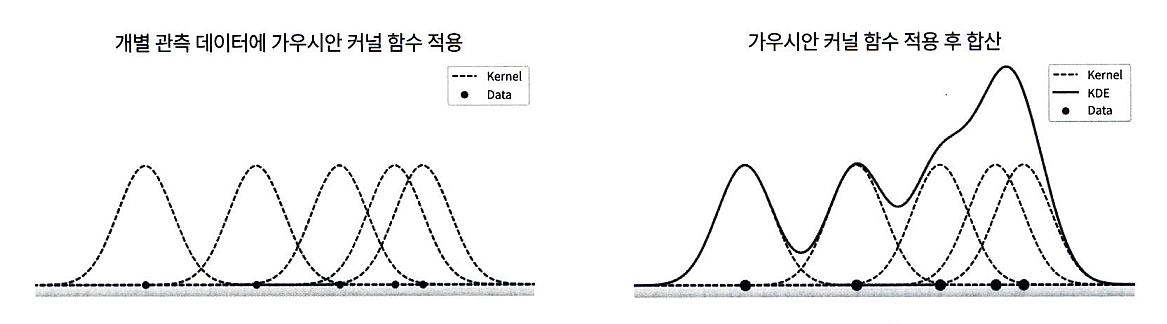
- 커널 함수식은 다음과 같이 표현. K는 커널 함수, x는 확률 변숫값, xi는 관측값, h는 대역폭(bandwidth)
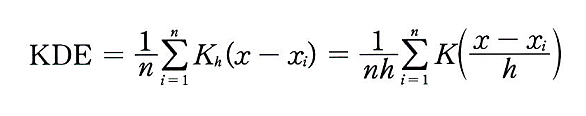
- 대역폭은 KDE 형태를 부드러운 형태로 평활화(Smoothing)하는 데 적용되며, 이 h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능이 크게 좌우 됨
- 아래 그림은 h 값을 증가시키면서 변화되는 KDE를 나타냄
- 작은 h값은 좁고 뽀죡한 KDE를 가지게 되며, 이는 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합하기 쉬움
- 큰 h 값은 과도하게 평활화된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며 결과적으로 과소적합(under-fitting)하기 쉬움
- 따라서 적절한 대역폭 h를 계산하는 것은 KDE 기반의 평균 이동 군집화에 매우 중요
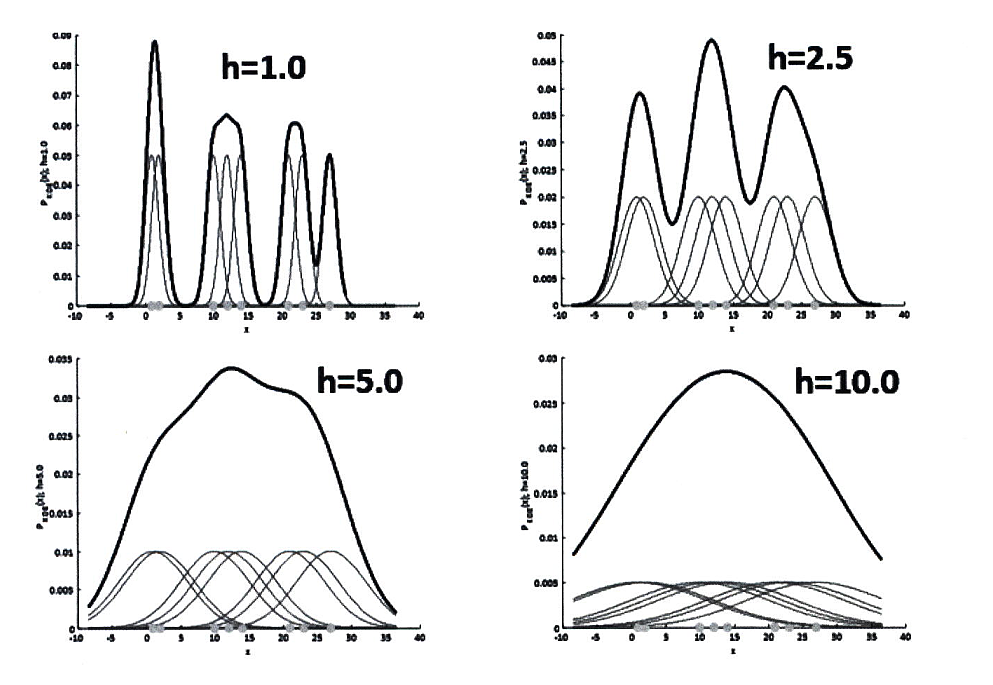
- 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며, 대역폭이 적을수록 많은 수의 중심점을 가짐
## 평균이동 알고리즘 절차
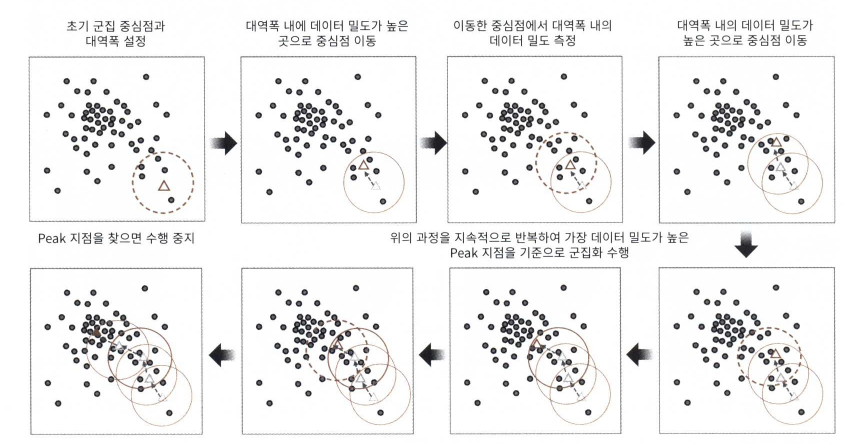
- 평균이동은 k-means와 다르게 군집의 개수를 지정할 필요가 없음
- 대역폭의 크기에 따라 알고리즘 자체에서 군집의 개수를 최적으로 선정
- 하지만 대역폭 크기를 어떤 값으로 설정하는가는 사용자가 정의내려야 하며 이에 따라 군집화의 품질이 결정됨
- 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행

# 예제
- make_blobs()의 cluster_std를 0.8로 정한 3개의 군집의 데이터에 의해 bandwidth를 0.9로 설정한 평균 이동 알고리즘을 적용한 예
- n_samples: 생성할 데이터 포인트의 총 개수입니다. 이 경우에는 200개의 데이터 포인트가 생성
- 
n_features: 각 데이터 포인트의 특징(차원) 개수입니다. 이 경우에는 2차원 데이터가 생
- 
centers: 생성될 클러스터의 개수입니다. 이 경우에는 3개의 클러스터가 
- 
cluster_std: 클러스터 내의 데이터 포인트들의 표준 편차입니다. 이 값을 통해 클러스터 내 데이터의 분산을 조절할 수 있습니다. 이 경우에는 0.8의 표준 편차를 갖는 클러스터가니다.

In [28]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


- 군집의 결과가 0에서 5까지 6개로 분류
- 실제 데이터보다 세분화되어 군집화가 되었음
- bandwidth의 값을 변경하여 다시 수행 

In [29]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- bandwidth의 값을 변경하여 군집의 개수를 변화시킴
- 실제 make_blobs를 사용하여 만든 데이터와 동일하게 3개의 군집으로 생성
- Meanshift 알고리즘은 bandwidth를 최적화 값으로 설정하는 것이 중요

# 최적화 bandwith 찾기 
- scikit-learn에서는 최적의 bandwidth 값을 찾기 위해 estimate_bandwidth()를 제공
- 파라미터로 피처 데이터 세트를 입력하면 최적화된 bandwidth를 계산 

In [31]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값 :', round(bandwidth, 3))

bandwidth 값 : 1.816


- estimate_bandwidth()로 측정된 bandwidth를 평균 이동 입력 값으로 적용해 동일한 make_blobs() 데이터 세트에 군집화를 수행

In [33]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X)
# best_bandwidth의 값을 참고하여 값을 설정 
meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 위의 결과인 군집 3개를 바탕으로 시각화
- k-means처럼 중심을 가지고 있으므로 cluster_centers_ 속성으로 군집 중심 좌표를 표시할 수 있음

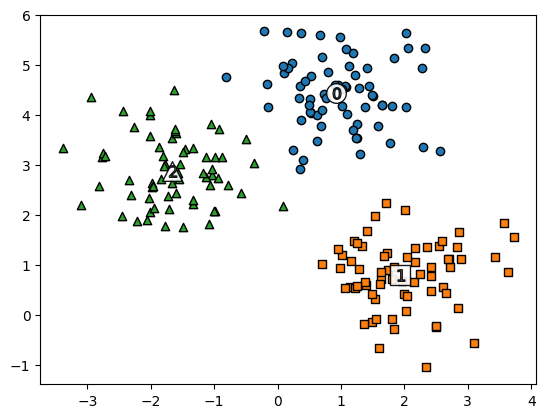

In [34]:
import matplotlib.pyplot as plt 

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster =clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용 
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 시각화 
    plt.scatter(x=center_x_y[0], y =center_x_y[1], s=200, color='white', edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y =center_x_y[1], s=70, color='white', edgecolor='k', alpha=0.9, marker='$%d$' % label)
    
plt.show()

In [35]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


# 장점
- 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능하다는 점
- 이상치의 영향력도 크지 않으며, 미리 군집의 개수를 정할 필요도 없음

# 단점
- 알고리즘 수행 시간이 오래 걸림
- bandwidth의 크기에 따른 군집화 영향도가 매우 큼

# 특이사항
- 이런 특징 때문에 일반적으로 평균 이동 군집화 기법은 업무 기반의 데이터 세트보다는 컴퓨터 비전영역에서 잘 사용됨
- 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는데 뛰어난 역할을 수행하는 알고리즘